In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
N = 100
std = 0.4
#ایجاد لیستی 500 تایی از اعداد به عنوان طول عرض 
Apple_width = np.random.normal(6, std , N)
Apple_length = np.random.normal(6, std , N)

Benanas_width = np.random.normal(4, std, N)
Benanas_length = np.random.normal(8, std, N)

In [48]:
#   طول هادر یک لیست در کنار هم و الحاق عرض ها و وزن ها 
width = np.concatenate((Apple_width, Benanas_width))
length = np.concatenate((Apple_length, Benanas_length))

In [49]:
# ایجاد یک آرایه دو بعدی که سطر های 1000 است و ستون های عرض و طول و وزن 3 است. ما به عنوان 
#ویژگی که میخواهیم روی آن ها "کا"ر کنیم
# ایجاد 500 عدد صفر و 500عدد یک برای انتصاب به لیبل بالن هاو خربزه ها
X = np.array([width, length]).T #تعویض جای سطر و ستون ها
Apple_lable = np.zeros(N, dtype = 'int') 
Benanas_lable = np.ones(N, dtype = 'int')
X

array([[6.03320282, 5.59850342],
       [5.79331928, 6.80653913],
       [5.09645468, 6.65907321],
       [6.03485835, 5.93763844],
       [6.07791729, 5.9437853 ],
       [6.20618019, 5.87309719],
       [6.65268982, 6.69723028],
       [6.27481942, 6.74951762],
       [5.88494979, 6.21387561],
       [5.64315874, 6.33446793],
       [6.31774774, 6.31307761],
       [5.78823451, 6.50338682],
       [6.3990347 , 5.89073319],
       [6.46080903, 6.67332461],
       [5.46068181, 5.99343126],
       [6.17630369, 5.78121362],
       [7.37255481, 5.95923407],
       [5.40490204, 6.208079  ],
       [6.03983461, 5.71343861],
       [5.71624384, 6.26353682],
       [5.48130158, 5.91223137],
       [6.12003232, 5.31376744],
       [6.57273368, 6.16052909],
       [5.93147251, 6.43374158],
       [6.18773734, 5.72150223],
       [6.15555674, 6.21150325],
       [5.58423862, 5.82416427],
       [6.15339289, 6.32299242],
       [6.00983622, 5.81386068],
       [6.51197316, 6.36807176],
       [5.

In [50]:
#به هم پیوستن لیبل بالن ها و خربزه ها برای ایجاد خروجی یا تارگت
Y = np.concatenate((Apple_lable,Benanas_lable))
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Text(0, 0.5, 'Length')

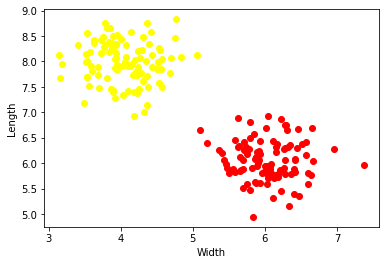

In [51]:
fig = plt.figure()
plt.scatter(X[0:N , 0] , X[0:N , 1] ,  c = 'RED')
plt.scatter(X[N: ,0] , X[N: ,1]  , c = 'yellow')
plt.xlabel('Width')
plt.ylabel('Length')

In [52]:
class kNearestNeighbors(): #چون الگوریتم ساده ای هست فاز "ترین" هم در آن ساده است
    def __init__(self, k):# زمانی الگوریتم میخواد اجرا بشه تنها چیزی میپرسه "کا" است
        self.k = k # یک "کا" به عنوان پارامتر براش میفرستیم
        # در این الگوریتم به این گونه است که موقعیت هر ایتم را بدوانیم(مثلا سیب ها کجا هستند ) تا بتوانی با ورود میوه جدید با یافتن فاصله محاسبات و پیش بینی انجام دهیم 
        # تابعی که عملیات "ترین" رو انجام میده معمولا به نام ""فیت" می شناسیم. یک سری داده را روی یک مدل فیت کنیم یعنی ان ها "ترین" شدندdef fit(self, X_train , Y_train): #( "ترین" میشه دانستن داده های ورودی)میوه هایی که از اول تولید کردیم و موجود هستند
    
    def fit(self, X_train , Y_train): 
        self.X_train = X_train
        self.Y_train = Y_train
        #الگوریتم حق داره تعداد دسته ها را بداند و کلاس هایی که توسط آن ها پیش بینی انجام شود باید مشخص گردد__ در تارگت ما دو عدد منحصر به فرد وجود دارد صفر و یک پس دوتا کلاس داریم
        self.number_classes = len(np.unique(Y_train))

        # اول باید همسایه هارو پیدا کنی تا بعد بریم سراغ همسایه های نزدیک
    def nearNeighbors(self , X_test):
        #از فاصله اقلیدوسی برای یافتن فاصله میوه جدید با 200 تا تمام میوه قبلی استفاده میکنیم 
        #فاصله با تمام میوه ها که حساب شد سورت میکنیم و "کا" تا نزدیک تر رو بر میداریم
        # تابع جمع در اینجا در نهایت یک عدد رو جزر میگیره و یک عدد به ما میده که به درد ما نخواهد خورد ما به اندازه تمام دیتای "ترین" شده فاصله نیاز داریم پس باشد اکسیس = 1 را قرار دهیم
        dist = np.sqrt(np.sum((X_test - self.X_train) ** 2 , axis = 1))
        #فاصله ها را سورت میکنه و "کا" تا اول را بر میداردو اسمش را میگزاریم همسایه های نزدیک    
        #وقتی بر اساس فاصله صورت میکنیم و در متغییر میریزیم فاصله هارو داریم
        # ما نیاز به فاصله ها نداریم ما نیاز به مشخص شن نوع میوه داریم پس از "آرگ سورت" استفاده میکنیم تا اندیس را داشته باشیم
        # بعد ازینکه اندیس "کا" میوه نزدیک را در بین تمام میوه ها بدست آوریم 
        near_neighbors = np.argsort(dist)[:self.k]
        # حال باید ببینیم از میوه های مشخص شده کدام تکرار بیشتری دارد
        print(" تا همسایه k ---->", near_neighbors)
        print(" برای همسایه های نزدیک Y ---->",self.Y_train[near_neighbors])      
        # با تایع "بین "کا"نت" می توانیم تعداد رخ داد های در آرایه را ببینیم یا بهتر بگیم تعداد تکرار مقادری هر خانه آرائه را نمایش می دهد
        # چک میکنیم اندیس  بیش"ترین" عدد تکرار شده را نشان بده تا بفهمیم 0 یا 1 بیشتر تکرار شده
        print("تعداد تکرار همسایه ----> ",np.bincount(self.Y_train[near_neighbors]))
        return near_neighbors

            
        # این تابع یک داده از ما میگیرد و برچسبش رو "ترین" میکنه و موقع جواب دادن رسیده. پس تنها پارامتری که میگیره ویژگی یا ایکس هست و خودش باید پیش بینی انجام دهد
        # کی‌ان‌ان" میگه "کا" همسایه های نزدیک رو پیدا کن و ببین به کدوم آیتم شبیه تر است"
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        #به همسایه های نزدیک تابع قبل نگاه میکند و پردیکت انجام میدهد 
        y = np.argmax(np.bincount(self.Y_train[near_neighbors]))
        return y

In [53]:
knn = kNearestNeighbors (k = 5)
knn.fit(X,Y)

In [54]:
new_fruit = np.array([4.7 , 6.8])
y_pred = knn.predict(new_fruit)
friut = { 0 : 'موز' , 
          1: 'سیب'}
print(friut[y_pred])

 تا همسایه k ----> [  2 134 111 167  83]
 برای همسایه های نزدیک Y ----> [0 1 1 1 0]
تعداد تکرار همسایه ---->  [2 3]
سیب
